In [1]:
from utils.result import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.io import loadmat
%reload_ext autoreload
%autoreload 2
stimuli = ['0-BEA', '0-BOL', '0-Ctl', '1-DatExt', '0-FAR', '0-GER', '0-ISO', '0-LIN', 
           '0-M2', '0-M3', '0-M4', '0-M5', '0-M6', '0-MAL', '0-MYR', '0-NER', 
           '1-P3', '1-P4', '1-P5', '1-P9', '1-P9_Hund', '1-P9_Ten', '1-P9_TenThous']		

mixture_dict = {"1-P9":["0-BEA","0-BOL","0-MAL","0-MYR","0-LIN","0-NER","0-GER","0-ISO","0-FAR"],
                "1-P5":["0-BEA","0-BOL","0-LIN","0-NER","0-GER"],
                "1-P4":["0-BEA","0-BOL","0-LIN","0-NER"],
                "1-P3":["0-BEA","0-BOL","0-LIN"],
                "0-M6":["0-MAL","0-MYR","0-NER","0-GER","0-ISO","0-FAR"],
                "0-M5":["0-MAL","0-MYR","0-GER","0-ISO","0-FAR"],
                "0-M4":["0-MAL","0-MYR","0-ISO","0-FAR"],
                "0-M3":["0-MAL","0-ISO","0-FAR"],
                "0-M2":["0-BEA","0-BOL"]}


/hpc/home/hy190/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


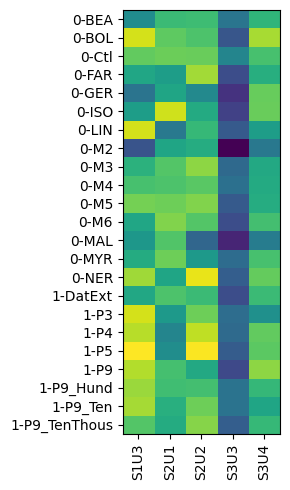

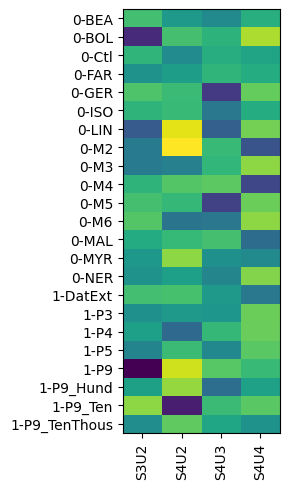

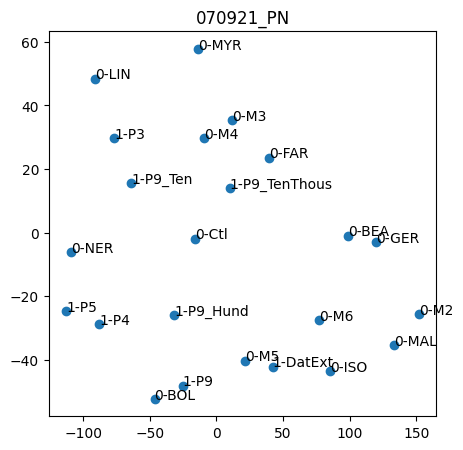

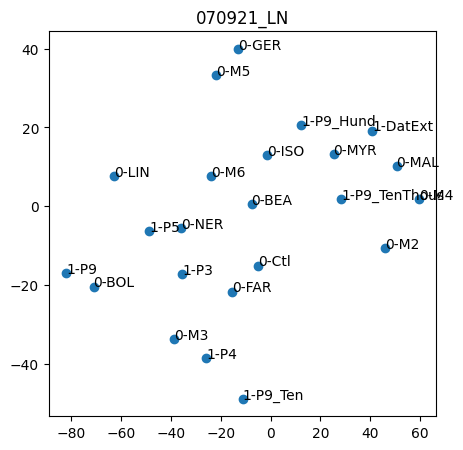

In [2]:
dur_spa_attcond_stim_ensemble_average_PN = []
dur_spa_attcond_stim_ensemble_average_LN = []
runPN, runLN = True, True
for target in range(0,14):
    
    if runPN:
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons_pn = analyze_betai(yaml_filepath="configPN/070921/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
        if len(spa_attcond_ensemble)>0:
            dur_spa_attcond_stim_ensemble_average_PN.append(spa_attcond_ensemble)
    if runLN:
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons_ln = analyze_betai(yaml_filepath="configLN/070921/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
        dur_spa_attcond_stim_ensemble_average_LN.append(spa_attcond_ensemble)
        
    if target == len(neurons_pn)-1:
        runPN = False
    if target == len(neurons_ln)-1:
        runLN = False
    

plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average_PN,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=["S1U3","S2U1","S2U2","S3U3","S3U4"],
              section="During")
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average_LN,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons_ln,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average_PN).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    #if "1" in stimuli[i]:
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070921_PN")
plt.savefig("plot/PN_2dTSNE_betai_070921.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average_LN).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
#    if "1" in stimuli[i]:
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070921_LN")
plt.savefig("plot/LN_2dTSNE_betai_070921.pdf", bbox_inches="tight")

/hpc/home/hy190/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/hpc/home/hy190/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


AxisError: axis 0 is out of bounds for array of dimension 0

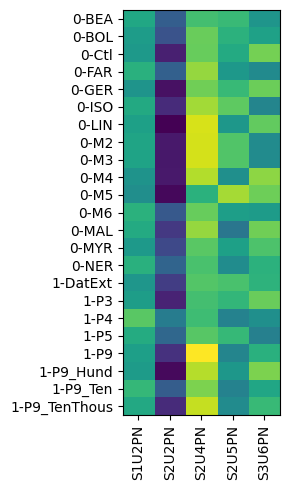

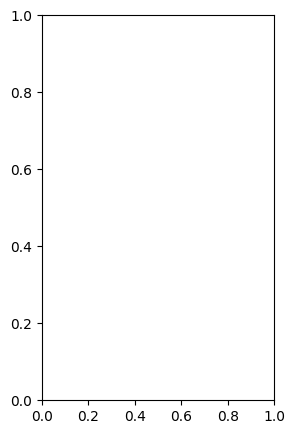

In [2]:
dur_spa_attcond_stim_ensemble_average_PN = []
dur_spa_attcond_stim_ensemble_average_LN = []
runPN, runLN = True, True
for target in range(0,14):
    
    if runPN:
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons_pn = analyze_betai(yaml_filepath="configPN/070924_1/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                                  addtype=True,
                                                                               cond=True)
        if spa_attcond_ensemble:
            dur_spa_attcond_stim_ensemble_average_PN.append(spa_attcond_ensemble)
    if runLN:
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons_ln = analyze_betai(yaml_filepath="configLN/070924_1/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               addtype=True,
                                                                               cond=True)
        if spa_attcond_ensemble:
            dur_spa_attcond_stim_ensemble_average_LN.append(spa_attcond_ensemble)
        
    if target == len(neurons_pn)-1:
        runPN = False
    if target == len(neurons_ln)-1:
        runLN = False
    

plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average_PN,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons_pn,
              section="During")
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average_LN,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons_ln,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average_PN).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    #if "1" in stimuli[i]:
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070924_1_PN")
plt.savefig("plot/PN_2dTSNE_betai_070924_1.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average_LN).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
#    if "1" in stimuli[i]:
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070924_1_LN")
plt.savefig("plot/LN_2dTSNE_betai_070924_1.pdf", bbox_inches="tight")

In [3]:
dur_spa_attcond_stim_ensemble_average_LN

[]

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


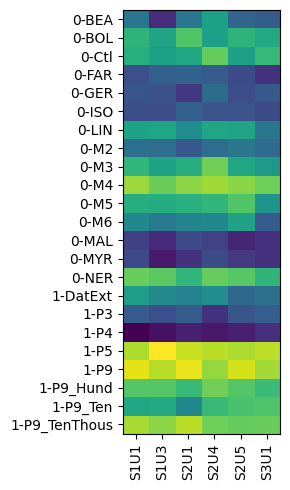

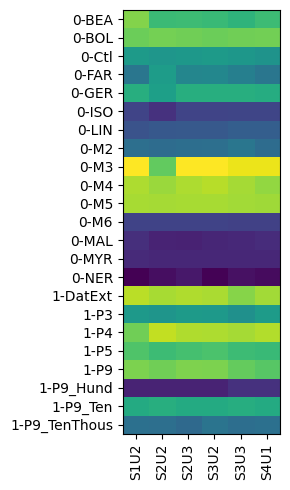

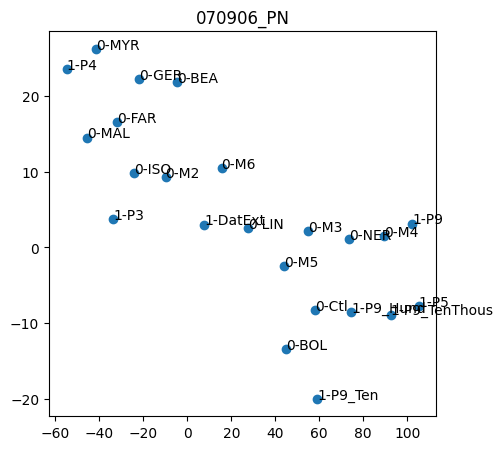

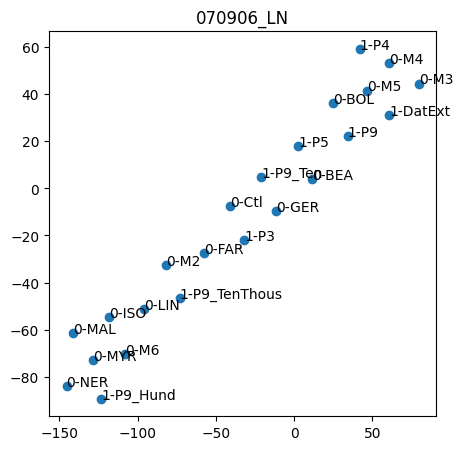

In [4]:
dur_spa_attcond_stim_ensemble_average_PN = []
dur_spa_attcond_stim_ensemble_average_LN = []
runPN, runLN = True, True
for target in range(0,12):
    
    if runPN:
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons_pn = analyze_betai(yaml_filepath="configPN/070906/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
        dur_spa_attcond_stim_ensemble_average_PN.append(spa_attcond_ensemble)
    if runLN:
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons_ln = analyze_betai(yaml_filepath="configLN/070906/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
        dur_spa_attcond_stim_ensemble_average_LN.append(spa_attcond_ensemble)
        
    if target == len(neurons_pn)-1:
        runPN = False
    if target == len(neurons_ln)-1:
        runLN = False
    

plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average_PN,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons_pn,
              section="During")
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average_LN,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons_ln,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average_PN).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    #if "1" in stimuli[i]:
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070906_PN")
plt.savefig("plot/PN_2dTSNE_betai_070906.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average_LN).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
#    if "1" in stimuli[i]:
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070906_LN")
plt.savefig("plot/LN_2dTSNE_betai_070906.pdf", bbox_inches="tight")

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


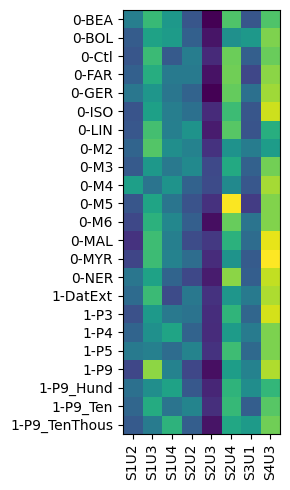

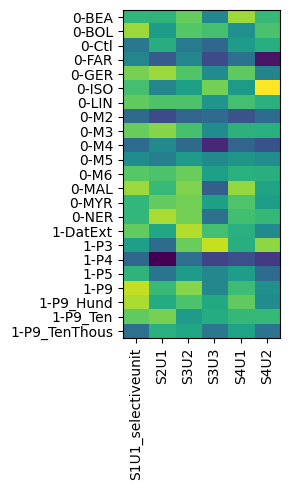

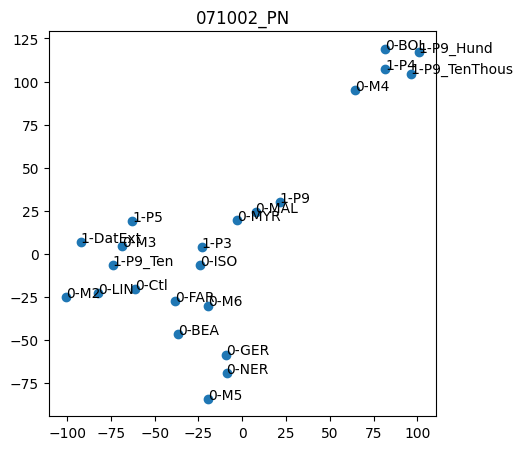

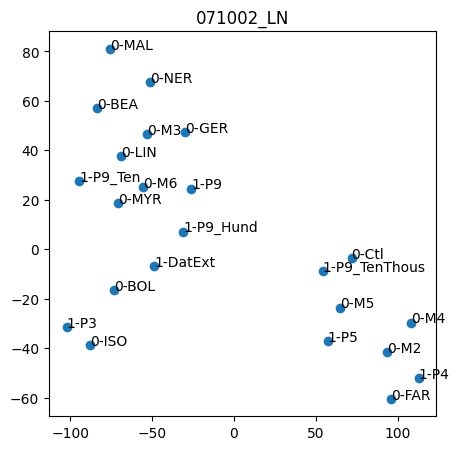

In [5]:
dur_spa_attcond_stim_ensemble_average_PN = []
dur_spa_attcond_stim_ensemble_average_LN = []
runPN, runLN = True, True
for target in range(0,14):
    
    if runPN:
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons_pn = analyze_betai(yaml_filepath="configPN/071002/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
        dur_spa_attcond_stim_ensemble_average_PN.append(spa_attcond_ensemble)
    if runLN:
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons_ln = analyze_betai(yaml_filepath="configLN/071002/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
        dur_spa_attcond_stim_ensemble_average_LN.append(spa_attcond_ensemble)
        
    if target == len(neurons_pn)-1:
        runPN = False
    if target == len(neurons_ln)-1:
        runLN = False
    

plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average_PN,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons_pn,
              section="During")
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average_LN,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons_ln,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average_PN).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=3, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    #if "1" in stimuli[i]:
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("071002_PN")
plt.savefig("plot/PN_2dTSNE_betai_071002.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average_LN).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
#    if "1" in stimuli[i]:
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("071002_LN")
plt.savefig("plot/LN_2dTSNE_betai_071002.pdf", bbox_inches="tight")

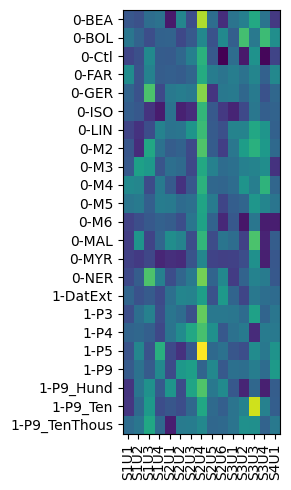

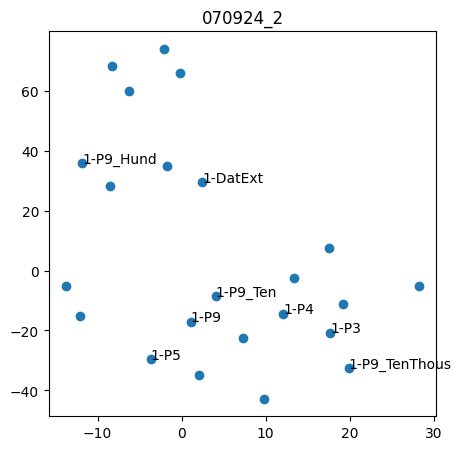

In [6]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/070924_2/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

# ignore the diluted P9
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070924_2")
plt.savefig("plot/2dTSNE_betai_070924_2.pdf", bbox_inches="tight")

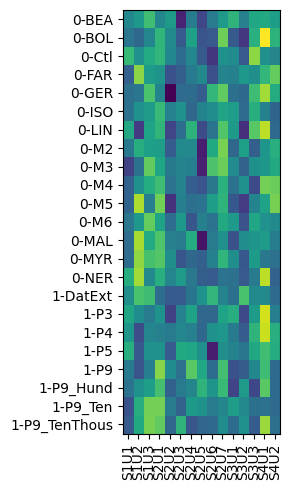

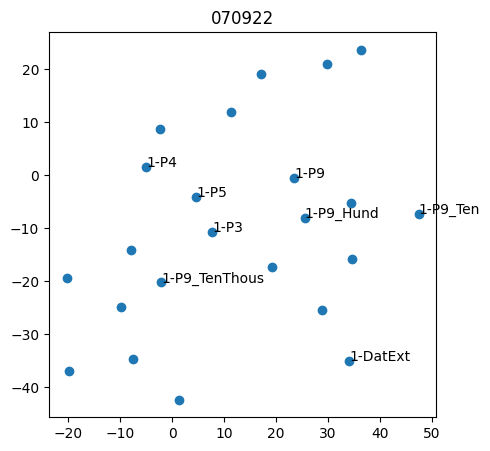

In [7]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/070922/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

# ignore the diluted P9
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070922")
plt.savefig("plot/2dTSNE_betai_070922.pdf", bbox_inches="tight")

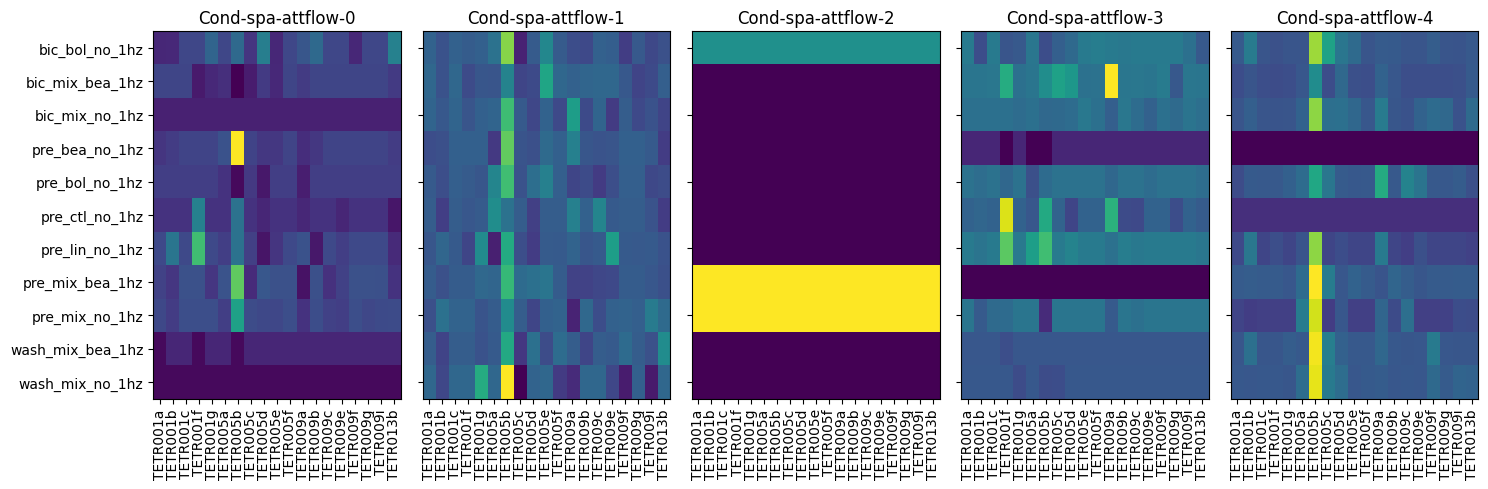

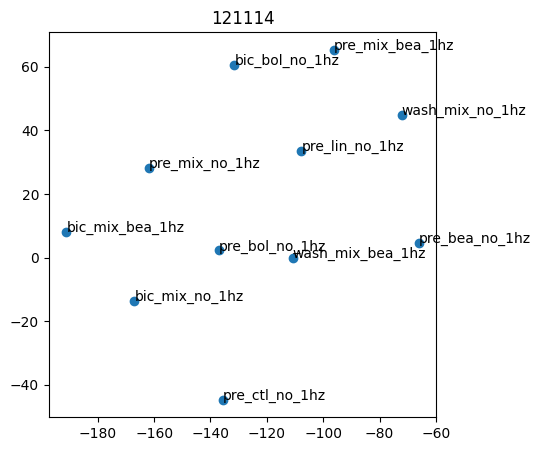

In [6]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []
stimuli_new = ["bic_bol_no_1hz","bic_mix_bea_1hz","bic_mix_no_1hz","pre_bea_no_1hz",
               "pre_bol_no_1hz","pre_ctl_no_1hz","pre_lin_no_1hz","pre_mix_bea_1hz"	,
               "pre_mix_no_1hz","wash_mix_bea_1hz","wash_mix_no_1hz"]
for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/121114/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True,
                                                                               q=stimuli_new)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([dur_spa_attcond_stim_ensemble_average[0],
               dur_spa_attcond_stim_ensemble_average[1],
               dur_spa_attcond_stim_ensemble_average[2],
               dur_spa_attcond_stim_ensemble_average[3],
               dur_spa_attcond_stim_ensemble_average[4]], 
              ["Cond-spa-attflow-0", "Cond-spa-attflow-1", "Cond-spa-attflow-2", "Cond-spa-attflow-3", "Cond-spa-attflow-4"], 
              "ALL",
              q_labels=stimuli_new,
              neurons=neurons,
              section="During")


mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")
plt.show()

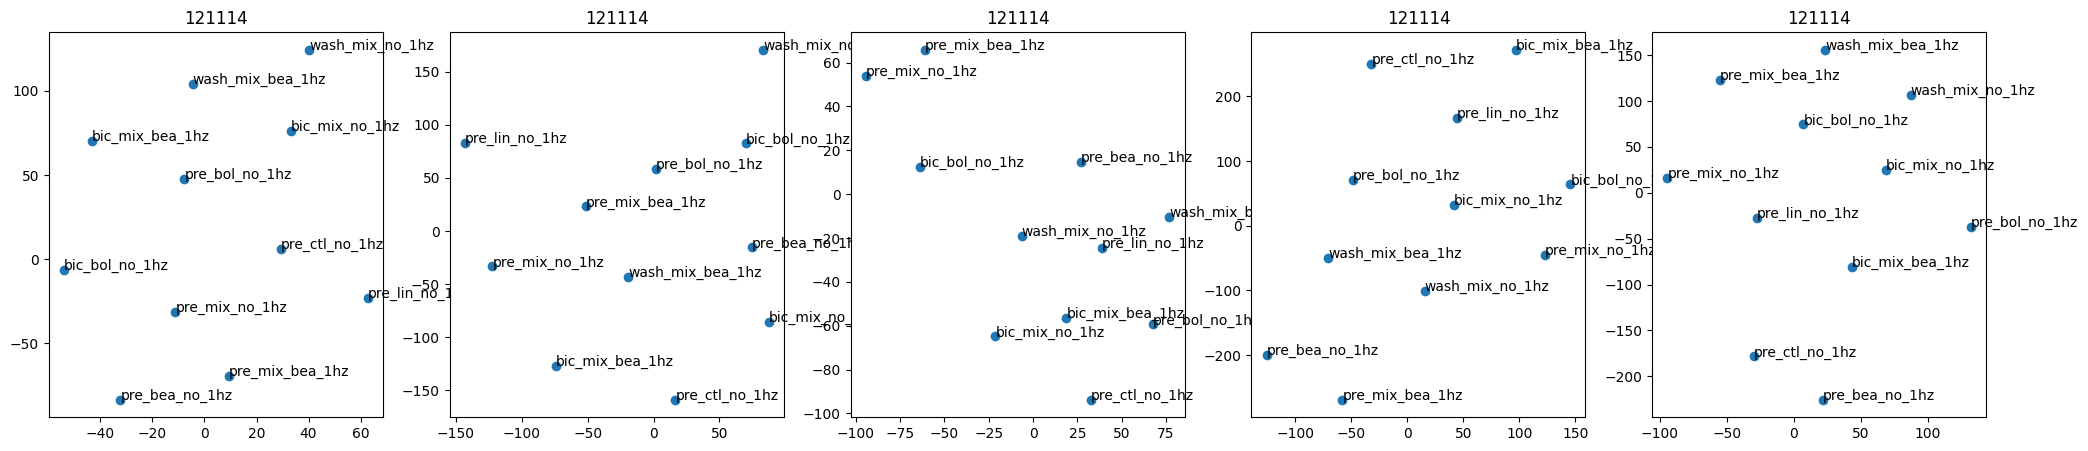

In [12]:
# ignore the diluted P9
plt.figure(figsize=(25,5))
ax=plt.subplot(151)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")

ax=plt.subplot(152)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[1].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")

ax=plt.subplot(153)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[2].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")

ax=plt.subplot(154)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[3].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")

ax=plt.subplot(155)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[4].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")
plt.show()

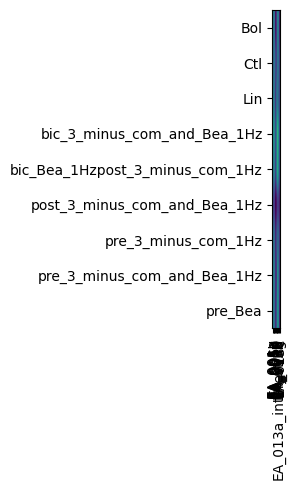

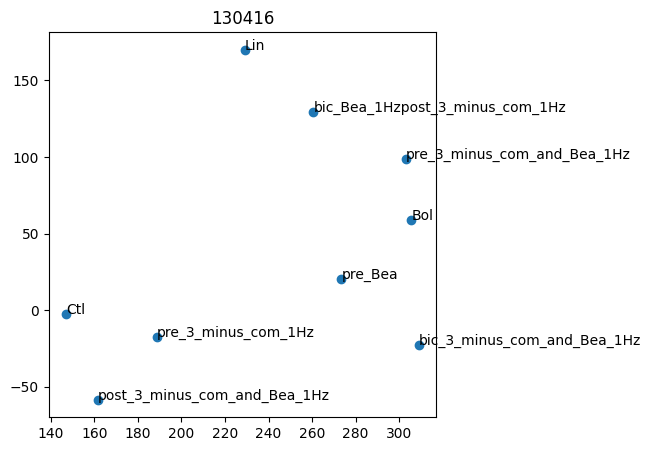

In [7]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []
stimuli_new = ["Bol","Ctl","Lin","bic_3_minus_com_and_Bea_1Hz","bic_Bea_1Hz"
               "post_3_minus_com_1Hz","post_3_minus_com_and_Bea_1Hz","pre_3_minus_com_1Hz",
               "pre_3_minus_com_and_Bea_1Hz","pre_Bea"]

for target in range(0,10):
    spa_attcond_betai, _, spa_attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/130416/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True,
                                                                               q=stimuli_new)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli_new,
              neurons=neurons,
              section="During")

# ignore the diluted P9
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = TSNE(n_components=2, perplexity=3, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("130416")
plt.show()